# Importing dependencies and GPU Setup

In [2]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Image Preparation

In [5]:
import os
import cv2
import imghdr
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Update data directory path
data_dir = '/content/drive/My Drive/Colab Notebooks/TensorFlow Image Classification/Data'

# List of valid image extensions
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

# Loops through folders in data directory
for image_class in os.listdir(data_dir):
    # Loops through images in subdirectories
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            # Checks if images can be loaded in OpenCV
            img = cv2.imread(image_path)
            # Checks if images match image paths
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                # Uncomment the following line to remove invalid images
                # os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)  # Uncomment this line if you want to remove problematic images

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image not in ext list /content/drive/My Drive/Colab Notebooks/TensorFlow Image Classification/Data/Good/screenshot_2023-04-19_20-13-19-lg_modland.webp
Image not in ext list /content/drive/My Drive/Colab Notebooks/TensorFlow Image Classification/Data/Good/i-agree-with-regular-car-reviews-the-modern-nissan-altima-is-an-awful-car-203815_1.jpg
Image not in ext list /content/drive/My Drive/Colab Notebooks/TensorFlow Image Classification/Data/Good/how-do-racing-vehicles-differ-from-these-normal-vehicles.webp
Image not in ext list /content/drive/My Drive/Colab Notebooks/TensorFlow Image Classification/Data/Good/xes-lg_modland.webp
Image not in ext list /content/drive/My Drive/Colab Notebooks/TensorFlow Image Classification/Data/Good/screenshot_2023-04-19_17-51-47-lg_modland.webp
Image not in ext list /content/drive/My Drive/Colab Notebooks/TensorFlow Image Classific

# Loading Data

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
# Converts Data folder into a dataset with labels based on folder names and creates a data pipeline with image data being processed in batches
data = tf.keras.utils.image_dataset_from_directory('/content/drive/My Drive/Colab Notebooks/TensorFlow Image Classification/Data')

Found 253 files belonging to 2 classes.


In [14]:
# Converts dataset into Numpy arrays
data_iterator = data.as_numpy_iterator()

In [15]:
# Gets the data in a batch
batch = data_iterator.next()

In [10]:
batch[0].shape

(32, 256, 256, 3)

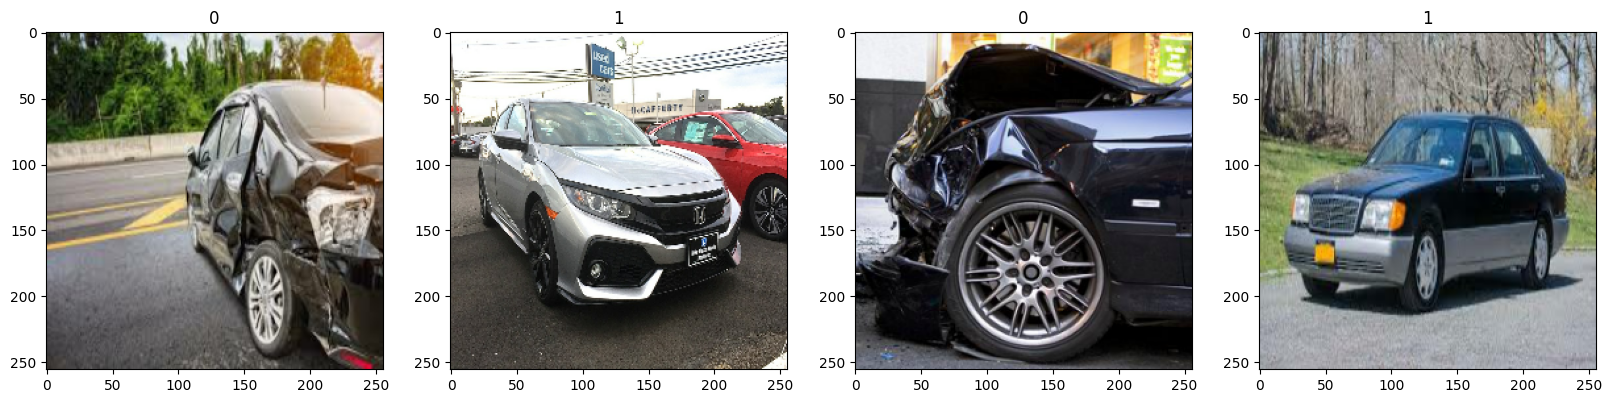

In [16]:
# Plotting 4 images in a batch
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scaling Data

In [17]:
batch[0].max()

255.0

In [18]:
data = data.map(lambda x,y: (x/255, y))

In [19]:
# Viewing scaled data in a batch
data.as_numpy_iterator().next()

(array([[[[0.32156864, 0.08627451, 0.08235294],
          [0.32255667, 0.08627451, 0.08235294],
          [0.32713693, 0.08792126, 0.08399969],
          ...,
          [0.22346048, 0.26369485, 0.32871476],
          [0.08676471, 0.12205882, 0.18872549],
          [0.08459712, 0.11989124, 0.1865579 ]],
 
         [[0.32346815, 0.08627451, 0.08235294],
          [0.3239776 , 0.08627451, 0.08235294],
          [0.32873225, 0.08712362, 0.08399969],
          ...,
          [0.13630563, 0.17654   , 0.24155991],
          [0.07462194, 0.10991606, 0.17658272],
          [0.08825145, 0.12354556, 0.19021223]],
 
         [[0.32659313, 0.08572304, 0.08235294],
          [0.32659313, 0.08572304, 0.08235294],
          [0.3313018 , 0.08572304, 0.08399969],
          ...,
          [0.05109552, 0.09132989, 0.15634981],
          [0.08662504, 0.12191916, 0.18858583],
          [0.09096751, 0.12626164, 0.1929283 ]],
 
         ...,
 
         [[0.3180371 , 0.43134573, 0.5489928 ],
          [0.29413

# Splitting Data

In [20]:
# Assigning splitted data sizes
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [21]:
val_size

1

In [22]:
# Splitting data in a batch
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Building CNN

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# Training

In [28]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 13s 933ms/step - loss: 1.9036 - accuracy: 0.4609 - val_loss: 1.1093 - val_accuracy: 0.4375
Epoch 2/20
4/4 [==============================] - 8s 2s/step - loss: 0.7986 - accuracy: 0.4844 - val_loss: 0.6900 - val_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 5s 928ms/step - loss: 0.6768 - accuracy: 0.4922 - val_loss: 0.6581 - val_accuracy: 0.7812
Epoch 4/20
4/4 [==============================] - 8s 2s/step - loss: 0.6518 - accuracy: 0.6953 - val_loss: 0.6523 - val_accuracy: 0.6875
Epoch 5/20
4/4 [==============================] - 5s 894ms/step - loss: 0.6386 - accuracy: 0.6719 - val_loss: 0.5864 - val_accuracy: 0.9375
Epoch 6/20
4/4 [==============================] - 6s 907ms/step - loss: 0.5976 - accuracy: 0.7031 - val_loss: 0.5900 - val_accuracy: 0.6562
Epoch 7/20
4/4 [==============================] - 5s 880ms/step - loss: 0.5370 - accuracy: 0.7266 - val_loss: 0.5173 - val_accuracy: 0.7188
Epoch 8/20
4/4 [=========

# Plotting Performance

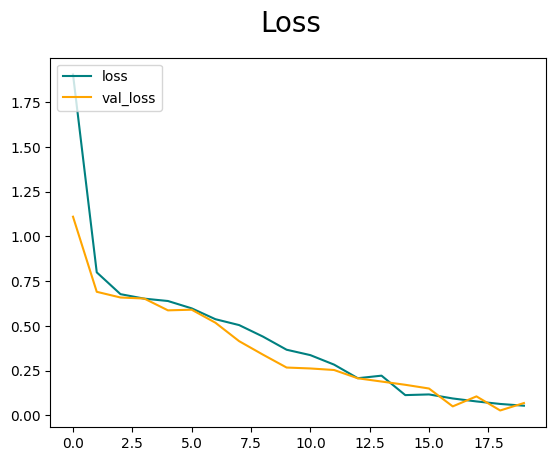

In [30]:
# Plotting Loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

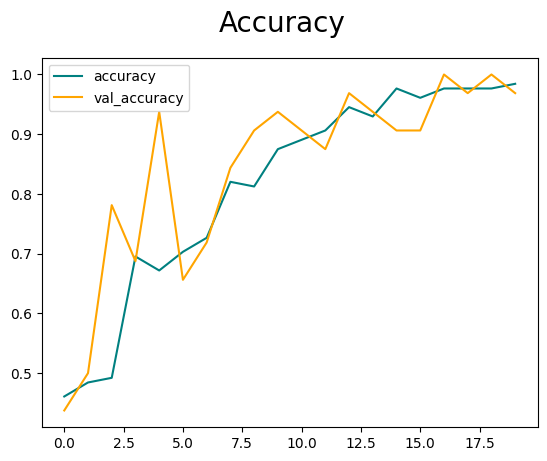

In [31]:
# Plotting Accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluation

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [33]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [34]:
# Evaluating results through batches
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 178ms/step


In [35]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# Testing

Using a random image that the CNN has not seen before

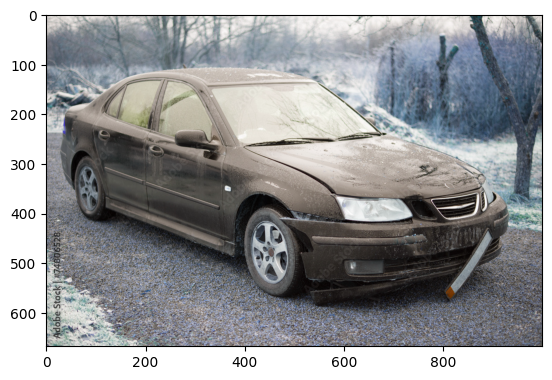

In [36]:
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/TensorFlow Image Classification/bad_test.jpg')

# Check if the image was read successfully
if img is None:
    print("Error: Unable to read the image.")
else:
    # Display the image using matplotlib
    plt.imshow(img)
    plt.show()

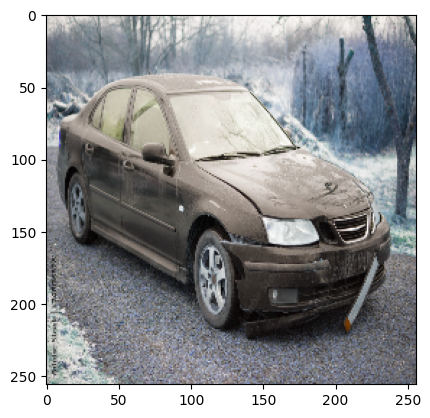

In [37]:
# Resizing image
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
# Expanding the image data array dimensions because the CNN takes data in batches
yhat = model.predict(np.expand_dims(resize/255, 0))

yhat

1/1 [==============================] - 0s 242ms/step


array([[0.8494144]], dtype=float32)

In [39]:
if yhat > 0.5:
    print(f'car is in bad condition')
else:
    print(f'car is in Good Condition')

car is in bad condition


# Saving Model

In [40]:
from tensorflow.keras.models import load_model

In [41]:
model.save(os.path.join('/content/drive/My Drive/Colab Notebooks/TensorFlow Image Classification/models','car_condition_classifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
